In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Cleaning Data

In [2]:
types = pd.read_csv('types.csv', sep=';')
codes = pd.read_csv('codes.csv', sep=';')
transactions = pd.read_csv('transactions.csv', sep=';')
train = pd.read_csv('train_set.csv', sep=';')

In [3]:
print(types.info())
types.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   type              155 non-null    int64 
 1   type_description  155 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB
None


,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,н/д(нет данных)
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....


In [4]:
print(codes.info())
codes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   code              184 non-null    int64 
 1   code_description  184 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.0+ KB
None


,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"


In [5]:
print(transactions.info())
transactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130039 entries, 0 to 130038
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   client_id  130039 non-null  int64  
 1   datetime   130039 non-null  object 
 2   code       130039 non-null  int64  
 3   type       130039 non-null  int64  
 4   sum        130039 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 5.0+ MB
None


,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87


In [6]:
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  6000 non-null   int64
 1   target     6000 non-null   int64
dtypes: int64(2)
memory usage: 93.9 KB
None


,client_id,target
0,75063019,0
1,86227647,1
2,6506523,0
3,50615998,0
4,95213230,0


In [7]:
transactions=transactions.merge(train, how='left', on='client_id')
transactions.head()

,client_id,datetime,code,type,sum,target
0,96372458,421 06:33:15,6011,2010,-561478.94,0.0
1,24567813,377 17:20:40,6011,7010,67377.47,NaN
2,21717441,55 13:38:47,6011,2010,-44918.32,0.0
3,14331004,263 12:57:08,6011,2010,-3368873.66,NaN
4,85302434,151 10:34:12,4814,1030,-3368.87,0.0


Text(0.5, 1.0, 'Ratio of missing values per columns')

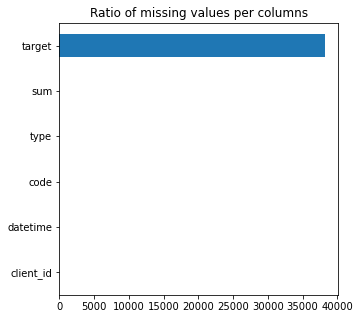

In [8]:
plt.figure(figsize=(5, 5))
transactions.isnull().sum(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")

In [9]:
df=transactions[transactions.target.notnull()]
df.head()

,client_id,datetime,code,type,sum,target
0,96372458,421 06:33:15,6011,2010,-561478.94,0.0
2,21717441,55 13:38:47,6011,2010,-44918.32,0.0
4,85302434,151 10:34:12,4814,1030,-3368.87,0.0
5,31421357,398 00:00:00,5411,1110,-1572.14,0.0
6,84826852,423 15:27:55,6010,7070,5654.99,1.0


Text(0.5, 1.0, 'Ratio of missing values per columns')

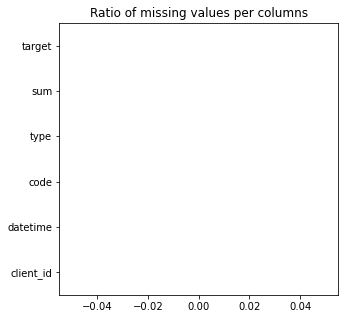

In [10]:
plt.figure(figsize=(5, 5))
df.isnull().sum(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")

In [11]:
df['date'] = df.datetime.apply(lambda x: x.split(' ')[0])

<ipython-input-11-5343dd3da0e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df.datetime.apply(lambda x: x.split(' ')[0])


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91826 entries, 0 to 130038
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  91826 non-null  int64  
 1   datetime   91826 non-null  object 
 2   code       91826 non-null  int64  
 3   type       91826 non-null  int64  
 4   sum        91826 non-null  float64
 5   target     91826 non-null  float64
 6   date       91826 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ MB


In [13]:
print('Dupplicate entries: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

Dupplicate entries: 19


<ipython-input-13-d1510d980fdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


In [14]:
df.index = range(len(df))

## Exploratory Analysis

In [15]:
customer_type=df[['client_id','type']].drop_duplicates()
ct = customer_type.groupby(['type'])['client_id'].aggregate('count').reset_index().sort_values('client_id', ascending=False).head(10)
ct.merge(types, how='left', on='type')

,type,client_id,type_description
0,2010,4543,Выдача наличных в АТМ
1,1010,4124,Покупка. POS
2,1030,4081,Оплата услуги. Банкоматы
3,1110,3443,Покупка. POS
4,7010,1898,Взнос наличных через АТМ (в своем тер.банке)
5,2370,1680,Списание с карты на карту по операции <перевод...
6,7070,1554,Перевод на карту (с карты) через Мобильный бан...
7,1100,844,Покупка.
8,7030,644,Перевод на карту (с карты) через АТМ (в предел...
9,2330,621,Списание с карты по операции “перевода с карты...


In [16]:
customer_code=df[['client_id','code']].drop_duplicates()
cc = customer_code.groupby(['code'])['client_id'].aggregate('count').reset_index().sort_values('client_id', ascending=False).head(10)
cc.merge(codes, how='left', on='code')

,code,client_id,code_description
0,6011,5158,Финансовые институты — снятие наличности автом...
1,4814,4135,"Звонки с использованием телефонов, считывающих..."
2,5411,3496,"Бакалейные магазины, супермаркеты"
3,4829,2524,Денежные переводы
4,6010,2246,Финансовые институты — снятие наличности вручную
5,5499,1669,"Различные продовольственные магазины — рынки, ..."
6,5912,1233,Аптеки
7,5541,1002,Станции техобслуживания
8,5331,917,Универсальные магазины
9,5812,715,"Места общественного питания, рестораны"


In [17]:
df.date=pd.to_numeric(df.date)
#df.date = df.date.apply(lambda x: x-365 if x>365 else x)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [18]:
print(df.date.min())
print(df.date.max()) 

0
456


In [19]:
df['date-30'] = df.date.apply(lambda x: f'{x//30 * 30}-{round(x//30 * 30 + 29.99, 2)}')
df.head()

<ipython-input-19-e4eb62f75bf4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date-30'] = df.date.apply(lambda x: f'{x//30 * 30}-{round(x//30 * 30 + 29.99, 2)}')


,client_id,datetime,code,type,sum,target,date,date-30
0,96372458,421 06:33:15,6011,2010,-561478.94,0.0,421,420-449.99
1,21717441,55 13:38:47,6011,2010,-44918.32,0.0,55,30-59.99
2,85302434,151 10:34:12,4814,1030,-3368.87,0.0,151,150-179.99
3,31421357,398 00:00:00,5411,1110,-1572.14,0.0,398,390-419.99
4,84826852,423 15:27:55,6010,7070,5654.99,1.0,423,420-449.99


In [20]:
df['date-30'].value_counts()

420-449.99    7107
390-419.99    6849
300-329.99    6611
360-389.99    6606
330-359.99    6571
210-239.99    6413
270-299.99    6406
240-269.99    6158
180-209.99    6107
120-149.99    5882
90-119.99     5560
60-89.99      5172
150-179.99    5082
30-59.99      4923
0-29.99       4744
450-479.99    1616
Name: date-30, dtype: int64

In [21]:
copy_train = pd.DataFrame(train['client_id'])
copy_train['sum-total'] = copy_train.client_id.apply(lambda x: 1 if df[df.client_id==x]['sum'].sum()>0 else 0)
df = df.merge(copy_train, how='left', on='client_id')
df.head()

,client_id,datetime,code,type,sum,target,date,date-30,sum-total
0,96372458,421 06:33:15,6011,2010,-561478.94,0.0,421,420-449.99,0
1,21717441,55 13:38:47,6011,2010,-44918.32,0.0,55,30-59.99,0
2,85302434,151 10:34:12,4814,1030,-3368.87,0.0,151,150-179.99,0
3,31421357,398 00:00:00,5411,1110,-1572.14,0.0,398,390-419.99,0
4,84826852,423 15:27:55,6010,7070,5654.99,1.0,423,420-449.99,1


In [22]:
# 75% people have 0
df['sum-total'].value_counts(normalize=True)

0    0.749747
1    0.250253
Name: sum-total, dtype: float64

In [23]:
def unique_counts(data):
    for i in data.columns:
        count = data[i].nunique()
        print(i, ": ", count)
unique_counts(df)

client_id :  6000
datetime :  81502
code :  173
type :  61
sum :  20860
target :  2
date :  457
date-30 :  16
sum-total :  2


In [24]:
def cluster(x):
    if x<1000:
        return 'Ветеринарные услуги'
    elif (x>999) & (x<2000):
        return 'Подрядчики'
    elif (x>1999) & (x<3000):
        return 'Разнообразные издательства'
    elif (x>2999) & (x<4000):
        return 'Туризм'
    elif (x>3999) & (x<5000):
        return 'Услуги'
    elif (x>4999) & (x<6000):
        return 'Покупка'
    elif (x>5999) & (x<7000):
        return 'Финанс'
    elif (x>6999) & (x<8000):
        return 'Ежедневные затраты'
    elif (x>7999) & (x<9000):
        return 'Медицина и образование'
    elif (x>8999) & (x<10000):
        return 'Правительственные услуги'
codes['category'] = codes.code.apply(lambda x: cluster(x))

In [25]:
codes.category.value_counts()

Покупка                       98
Ежедневные затраты            35
Услуги                        17
Медицина и образование        13
Финанс                         8
Правительственные услуги       5
Туризм                         3
Подрядчики                     3
Ветеринарные услуги            1
Разнообразные издательства     1
Name: category, dtype: int64

In [26]:
def cluster_types(x):
    if (x>999) & (x<2000):
        return 'Покупки'
    elif (x>1999) & (x<2300):
        return 'Операции с начислым'
    elif (x>2299) & (x<2355):
        return 'Кредит'
    elif (x>2339) & (x<2461):
        return 'Перевод'
    elif (x>2899) & (x<3000):
        return 'Списание денежных средств'
    elif (x>2999) & (x<4000):
        return 'Оплата'
    elif (x>3999) & (x<5000):
        return 'Списание комиссии'
    elif (x>4999) & (x<6000):
        return 'Списание денежных средств'
    elif (x>5999) & (x<7000):
        return 'Возврат денежных средств'
    elif (x>6999) & (x<9000):
        return 'Услуги банка'
types['category2'] = types.type.apply(lambda x: cluster_types(x))

In [27]:
types

,type,type_description,category2
0,8001,Установление расх. лимита по карте,Услуги банка
1,2411,Перевод с карты на счет др.лица в одном тер. б...,Перевод
2,4035,н/д(нет данных),Списание комиссии
3,3001,Комиссия за обслуживание ссудного счета,Оплата
4,2420,Перевод с карты на счет физ.лица в другом тер....,Перевод
...,...,...,...
150,4110,Плата за получение наличных в АТМ.,Списание комиссии
151,2320,Безналичный перевод денежных средств через POS,Кредит
152,7040,Перевод на карту (с карты) через POS (в предел...,Услуги банка
153,2433,Перевод с карты на счет физ.лица в другом банк...,Перевод


In [28]:
types[types.category2.isnull()]#.value_counts()

,type,type_description,category2
41,999999,XXX,None


In [29]:
df=df.merge(codes[['code', 'category']], how='left', on='code')
df=df.merge(types[['type', 'category2']], how='left', on='type')
df

,client_id,datetime,code,type,sum,target,date,date-30,sum-total,category,category2
0,96372458,421 06:33:15,6011,2010,-561478.94,0.0,421,420-449.99,0,Финанс,Операции с начислым
1,21717441,55 13:38:47,6011,2010,-44918.32,0.0,55,30-59.99,0,Финанс,Операции с начислым
2,85302434,151 10:34:12,4814,1030,-3368.87,0.0,151,150-179.99,0,Услуги,Покупки
3,31421357,398 00:00:00,5411,1110,-1572.14,0.0,398,390-419.99,0,Покупка,Покупки
4,84826852,423 15:27:55,6010,7070,5654.99,1.0,423,420-449.99,1,Финанс,Услуги банка
...,...,...,...,...,...,...,...,...,...,...,...
91802,57224158,380 13:52:15,6010,7030,7186.93,1.0,380,360-389.99,0,Финанс,Услуги банка
91803,28369355,305 11:59:34,4829,2330,-24705.07,0.0,305,300-329.99,1,Услуги,Кредит
91804,40949707,398 21:13:58,5411,1110,-40353.72,1.0,398,390-419.99,0,Покупка,Покупки
91805,7174462,409 13:58:14,5411,1010,-25536.06,1.0,409,390-419.99,0,Покупка,Покупки
